In [94]:
# -*- coding: utf-8 -*-
"""Capstone Project 1.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1KZWW0PvsnFpjitLPbrSQQXiV371FGHtp
"""

#Project 1



# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
from matplotlib import dates
from datetime import datetime
import sklearn
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns



walmart_data = pd.read_csv('Walmart (1).csv')
walmart_data.head()



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [33]:
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y', dayfirst=True)


In [36]:
# Convert 'Date' column to datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y', dayfirst=True)

# Check the data types and ensure 'Date' has been converted
walmart_data.info()

# Display the first few rows to verify
print(walmart_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26

In [38]:
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], errors='coerce', dayfirst=True)


In [40]:
walmart_data = walmart_data.dropna(subset=['Date'])


In [44]:
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='mixed')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
Missing values:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


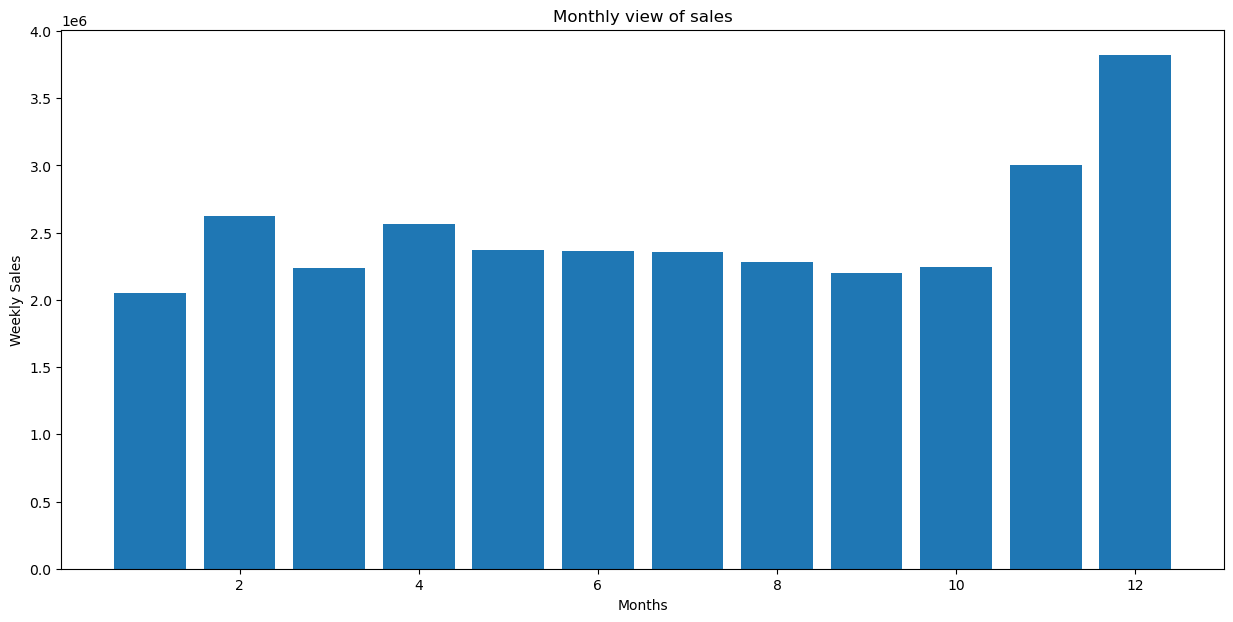

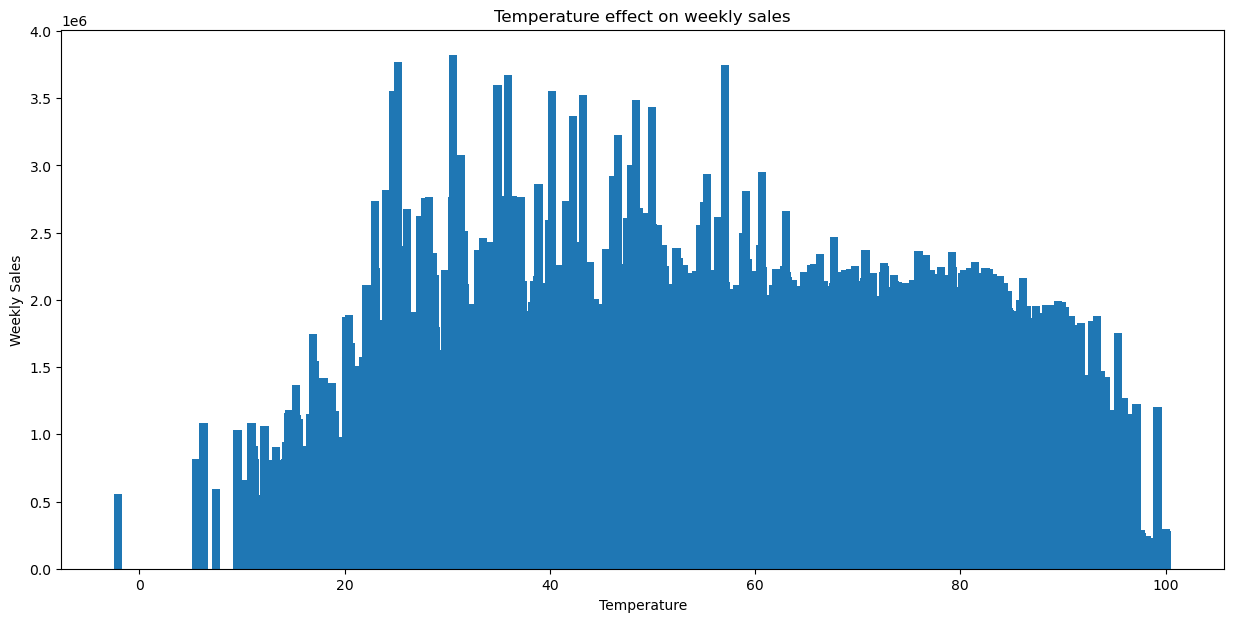

In [46]:
# Convert 'Date' to datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])
walmart_data.info()

# Check for missing values
print("Missing values:\n", walmart_data.isnull().sum())

# Extract day, month, and year from the 'Date' column
walmart_data["Day"] = walmart_data['Date'].dt.day
walmart_data["Month"] = walmart_data['Date'].dt.month
walmart_data["Year"] = walmart_data['Date'].dt.year

# 1. Useful Insights to Improve
# Overall Monthly Sales
plt.figure(figsize=(15, 7))
plt.bar(walmart_data["Month"], walmart_data["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

# Temperature effect on weekly sales
plt.figure(figsize=(15, 7))
plt.bar(walmart_data["Temperature"], walmart_data["Weekly_Sales"])
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.title("Temperature effect on weekly sales")
plt.show()

# Define holiday dates
Super_Bowl = pd.to_datetime(['2010-02-12', '2011-02-11', '2012-02-10'])
Labour_Day = pd.to_datetime(['2010-09-10', '2011-09-09', '2012-09-07'])
Thanksgiving = pd.to_datetime(['2010-11-26', '2011-11-25', '2012-11-23'])
Christmas = pd.to_datetime(['2010-12-31', '2011-12-30', '2012-12-28'])

In [54]:
# Calculate mean sales for holidays
Super_Bowl_Sales = walmart_data[walmart_data['Date'].isin(Super_Bowl)]['Weekly_Sales'].mean()
Labour_Day_Sales = walmart_data[walmart_data['Date'].isin(Labour_Day)]['Weekly_Sales'].mean()
Thanksgiving_Sales = walmart_data[walmart_data['Date'].isin(Thanksgiving)]['Weekly_Sales'].mean()
Christmas_Sales = walmart_data[walmart_data['Date'].isin(Christmas)]['Weekly_Sales'].mean()
Non_Holiday_Sales = walmart_data[walmart_data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

Mean_Sales = {
    'Super_Bowl_Sales': Super_Bowl_Sales,
    'Labour_Day_Sales': Labour_Day_Sales,
    'Thanksgiving_Sales': Thanksgiving_Sales,
    'Christmas_Sales': Christmas_Sales,
    'Non_Holiday_Sales': Non_Holiday_Sales
}

print("Mean Sales:\n", Mean_Sales)



Mean Sales:
 {'Super_Bowl_Sales': 1079127.9877037038, 'Labour_Day_Sales': 1042427.293925926, 'Thanksgiving_Sales': 1471273.427777778, 'Christmas_Sales': 960833.1115555555, 'Non_Holiday_Sales': 1041256.3802088555}


In [64]:
# 2. Forecast sales for each store for the next 12 weeks

# Reload the data for forecasting
data =pd.read_csv('Walmart (1).csv')

walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y', dayfirst=True)

# Convert 'Date' column to datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='%d-%m-%Y', dayfirst=True)

# Check the data types and ensure 'Date' has been converted
walmart_data.info()

# Display the first few rows to verify
print(walmart_data.head())

walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], errors='coerce', dayfirst=True)
walmart_data = walmart_data.dropna(subset=['Date'])
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'], format='mixed')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int32         
 9   Month         6435 non-null   int32         
 10  Year          6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), int64(2)
memory usage: 477.7 KB
   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2

In [68]:
# Convert 'Date' column to datetime format with dayfirst=True
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', dayfirst=True)

# Alternatively, if there are mixed or inconsistent formats
# data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

# Check for any parsing errors (NaT values)
print(data['Date'].isna().sum())  # Count of invalid dates


0


In [70]:
# Drop rows with invalid dates
data = data.dropna(subset=['Date'])

# Or fill invalid dates with a default value
data['Date'] = data['Date'].fillna(pd.Timestamp('1900-01-01'))


In [72]:
print(data['Date'].head(10))


0   2010-02-05
1   2010-02-12
2   2010-02-19
3   2010-02-26
4   2010-03-05
5   2010-03-12
6   2010-03-19
7   2010-03-26
8   2010-04-02
9   2010-04-09
Name: Date, dtype: datetime64[ns]


In [74]:
print(data['Date'].unique())


<DatetimeArray>
['2010-02-05 00:00:00', '2010-02-12 00:00:00', '2010-02-19 00:00:00',
 '2010-02-26 00:00:00', '2010-03-05 00:00:00', '2010-03-12 00:00:00',
 '2010-03-19 00:00:00', '2010-03-26 00:00:00', '2010-04-02 00:00:00',
 '2010-04-09 00:00:00',
 ...
 '2012-08-24 00:00:00', '2012-08-31 00:00:00', '2012-09-07 00:00:00',
 '2012-09-14 00:00:00', '2012-09-21 00:00:00', '2012-09-28 00:00:00',
 '2012-10-05 00:00:00', '2012-10-12 00:00:00', '2012-10-19 00:00:00',
 '2012-10-26 00:00:00']
Length: 143, dtype: datetime64[ns]


In [78]:
data['Date'] = pd.to_datetime(data['Date'])
data['Week'] = data['Date'].dt.isocalendar().week
data = data[['Store', 'Week', 'Weekly_Sales']]


In [80]:
# Group by Store and Week
data = data.groupby(['Store', 'Week'], as_index=False).sum()

In [90]:
# Handle missing or invalid data in Weekly_Sales
data['Weekly_Sales'] = pd.to_numeric(data['Weekly_Sales'], errors='coerce')
data['Weekly_Sales'] = data['Weekly_Sales'].fillna(data['Weekly_Sales'].median())


# Outlier detection
clf = IsolationForest(contamination=0.05, random_state=42)
data['Outlier'] = clf.fit_predict(data[['Weekly_Sales']])

In [96]:
# Remove outliers
data = data[data['Outlier'] != -1]

# Prepare features and target variable
X = data[['Store', 'Week']]
y = data['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Prepare data for the next 12 weeks prediction
last_week = data['Week'].max()
stores = data['Store'].unique()
next_weeks = pd.DataFrame({
    'Store': np.repeat(stores, 12),
    'Week': np.tile(range(last_week + 1, last_week + 13), len(stores))
})

# Predict sales for the next 12 weeks
sales_predictions = model.predict(next_weeks)

Mean Squared Error: 144621186099.03668


     Store  Week  Sales_Prediction
0        1    53      4.325894e+06
1        1    54      4.325894e+06
2        1    55      4.325894e+06
3        1    56      4.325894e+06
4        1    57      4.325894e+06
..     ...   ...               ...
535     45    60      2.054090e+06
536     45    61      2.054090e+06
537     45    62      2.054090e+06
538     45    63      2.054090e+06
539     45    64      2.054090e+06

[540 rows x 3 columns]


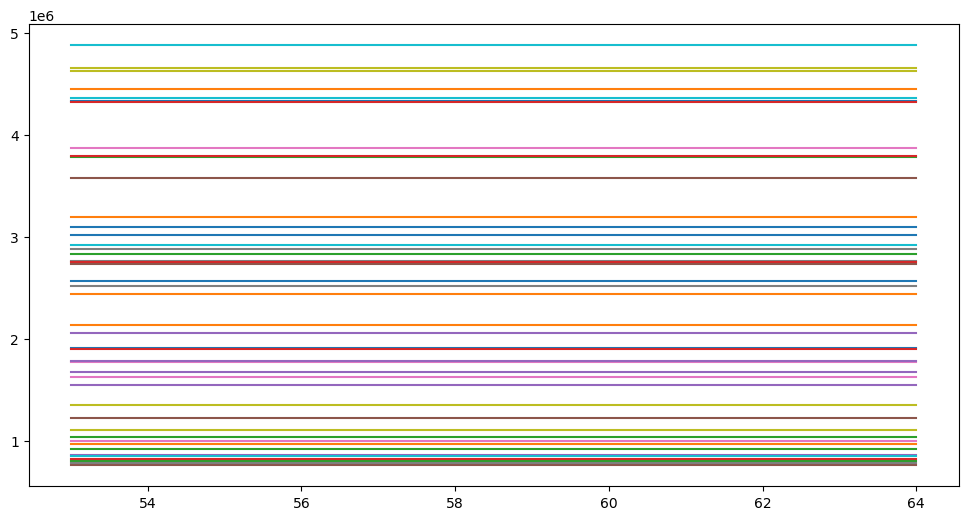

In [98]:
# Create a predictions DataFrame
predictions_df = next_weeks.copy()
predictions_df['Sales_Prediction'] = sales_predictions

# Display predictions
print(predictions_df)

# Plot sales predictions for each store
plt.figure(figsize=(12, 6))
for store in predictions_df['Store'].unique():
    store_predictions = predictions_df[predictions_df['Store'] == store]
    plt.plot(store_predictions['Week'], store_predictions['Sales_Prediction'], label=f'Store {store}')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


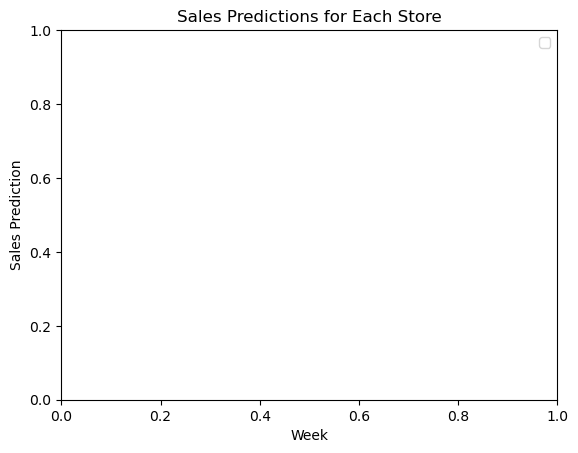

In [100]:

plt.xlabel('Week')
plt.ylabel('Sales Prediction')
plt.title('Sales Predictions for Each Store')
plt.legend()
plt.show()

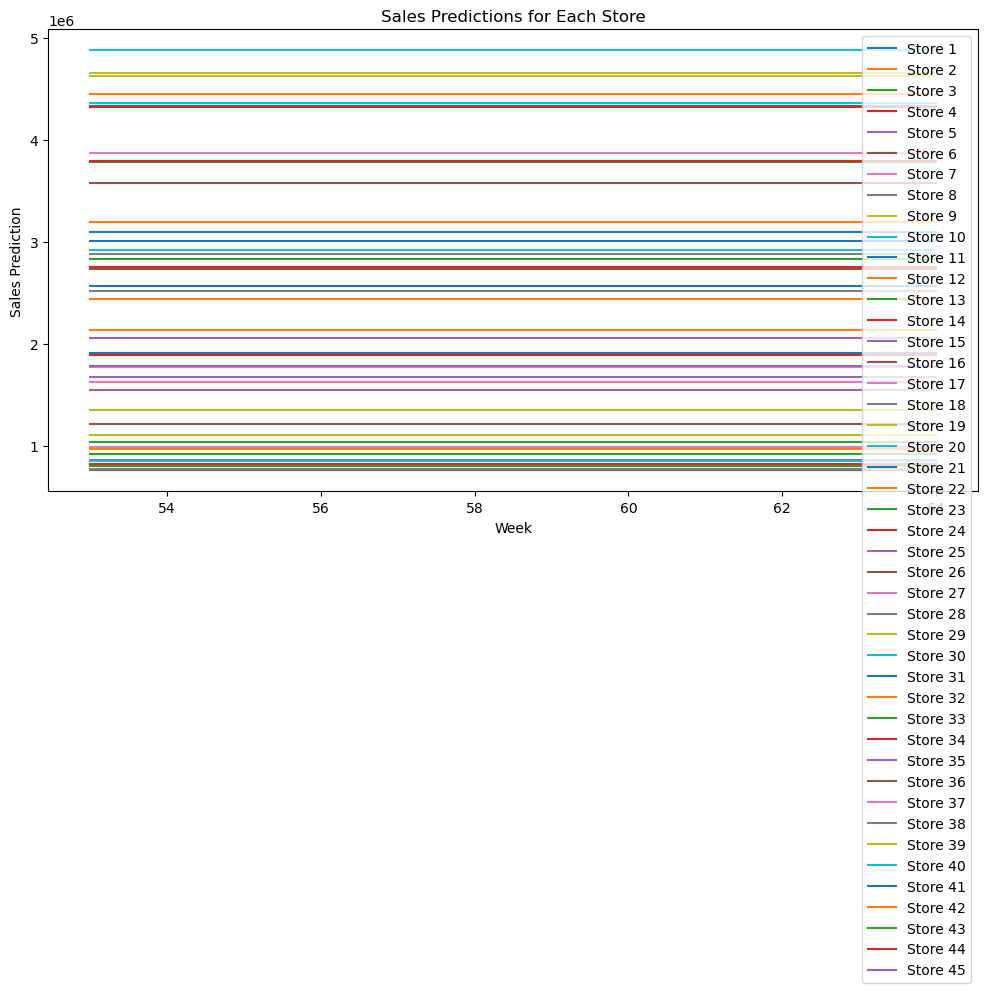

In [102]:
plt.figure(figsize=(12, 6))

# Plotting for each store with labels
for store in predictions_df['Store'].unique():
    store_predictions = predictions_df[predictions_df['Store'] == store]
    plt.plot(store_predictions['Week'], store_predictions['Sales_Prediction'], label=f'Store {store}')

# Adding labels and legend
plt.xlabel('Week')
plt.ylabel('Sales Prediction')
plt.title('Sales Predictions for Each Store')
plt.legend()  # Ensure legend includes all labeled plots
plt.show()



In [104]:
import joblib

# Save the model
joblib.dump(model, 'sales_prediction_model.pkl')


['sales_prediction_model.pkl']

In [106]:
pip install flask


Note: you may need to restart the kernel to use updated packages.


In [3]:
exit